# Solution Planning

## Input

### 1.0. Problema de Negócio

Nosso cliente é uma seguradora que forneceu Seguro Saúde para seus clientes, agora eles precisam de sua ajuda na construção de um modelo para prever a propensão se os segurados (clientes) do ano passado também terão interesse no Seguro Automóvel oferecido pela empresa.

**Responder às seguintes perguntas de negócio:**
1. Principais Insights sobre os atributos mais relevantes de clientes interessados em adquirir um seguro de automóvel.
2. Qual a porcentagem de clientes interessados em adquirir um seguro de automóvel, o time de vendas conseguirá contatar fazendo 20.000 ligações?
3. E se a capacidade do time de vendas aumentar para 40.000 ligações, qual a porcentagem de clientes interessados em adquirir um seguro de automóvel o time de vendas conseguirá contatar?
4. Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel?

### 2.0. Base de Dados de Health Insurance
https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

## Output

1. Construir um modelo para prever a propensão se um cliente estaria interessado em seguro de veículos.
2. Disponibilizar o Modelo em uma API
3. Relatório com as perguntas de negócio.

## Task

### 1.0 Construição do modelo de Rank To Learning
1. data description
2. feature engineering
3. eda 


### 2.0. Relatório com as respostas das Perguntas de Negocio.
1. Principais Insights sobre os atributos mais relevantes de clientes interessados em adquirir um seguro de automóvel.
2. Qual a porcentagem de clientes interessados em adquirir um seguro de automóvel, o time de vendas conseguirá contatar fazendo 20.000 ligações?
3. E se a capacidade do time de vendas aumentar para 40.000 ligações, qual a porcentagem de clientes interessados em adquirir um seguro de automóvel o time de vendas conseguirá contatar?
4. Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel?


# 0.0. Imports

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scikitplot as skplt

from IPython.display import HTML

from sklearn import preprocessing as pp
from sklearn import model_selection as ms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble as en

## 0.1. Helper Functions

In [2]:
def descriptive_statistics(num_attr):
    # Central Tendency: mean, median
    c1 = pd.DataFrame(num_attr.apply(np.mean))
    c2 = pd.DataFrame(num_attr.apply(np.median))

    # Dispension: min, max, range, std, skew, kurtosis
    d1 = pd.DataFrame(num_attr.apply(min))
    d2 = pd.DataFrame(num_attr.apply(max))
    d3 = pd.DataFrame(num_attr.apply(lambda x: x.max() - x.min()))
    d4 = pd.DataFrame(num_attr.apply(lambda x: x.std()))
    
    # Measures of Shape
    s1 = pd.DataFrame(num_attr.apply(lambda x: x.skew()))
    s2 = pd.DataFrame(num_attr.apply(lambda x: x.kurtosis()))

    # concat
    m = pd.concat([d1,d2,d3,c1,c2,d4,s1,s2], axis=1).reset_index()
    m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
    return m

def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    
    sns.set_style("whitegrid")
    
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Load Data

In [8]:
df_raw = pd.read_csv('../data/raw/train.csv')

# 1.0. Data Description

In [9]:
df1 = df_raw.copy()

## 1.1. Rename Columns

In [18]:
cols = ['id',
        'gender',
        'age',
        'driving_license',
        'region_code',
        'previously_insured',
        'vehicle_age',
        'vehicle_damage',
        'annual_premium',
        'policy_sales_channel',
        'vintage',
        'response']

df1.columns = cols

## 1.2. Data Dimensions

In [21]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 381109
Number of Cols: 12


## 1.3. Data Types

In [23]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 1.4. Check NA

In [25]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.5. Change Dtypes 

In [26]:
df1.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.00,0,> 2 Years,Yes,40454.00,26.00,217,1
1,2,Male,76,1,3.00,0,1-2 Year,No,33536.00,26.00,183,0
2,3,Male,47,1,28.00,0,> 2 Years,Yes,38294.00,26.00,27,1
3,4,Male,21,1,11.00,1,< 1 Year,No,28619.00,152.00,203,0
4,5,Female,29,1,41.00,1,< 1 Year,No,27496.00,152.00,39,0


# 2.0. Feature Engeering
 

In [27]:
df2 = df1.copy()

# 3.0. Data Filtering
 

In [28]:
df3 = df2.copy()

# 4.0. EDA

In [29]:
df4 = df3.copy()

#  5.0. Data Preparation

In [38]:
df5 = df4.copy()

In [39]:
le = pp.LabelEncoder()

df5['gender'] = le.fit_transform( df5[['gender']].values.ravel() )
df5['vehicle_age'] = le.fit_transform( df5[['vehicle_age']].values.ravel() )
df5['vehicle_damage'] = le.fit_transform( df5[['vehicle_damage']].values.ravel() )

# 6.0. Data Preparation

In [46]:
X = df5.drop('response', axis=1)
y = df5['response'].copy()

x_train, x_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)

#  7.0. Model Training

## 7.1. KNeighborsClassifier


In [64]:
# model definition
model_knn = KNeighborsClassifier()

# fit
model_knn.fit(x_train, y_train)

# predict
yhat_knn = model_knn.predict_proba(x_test)

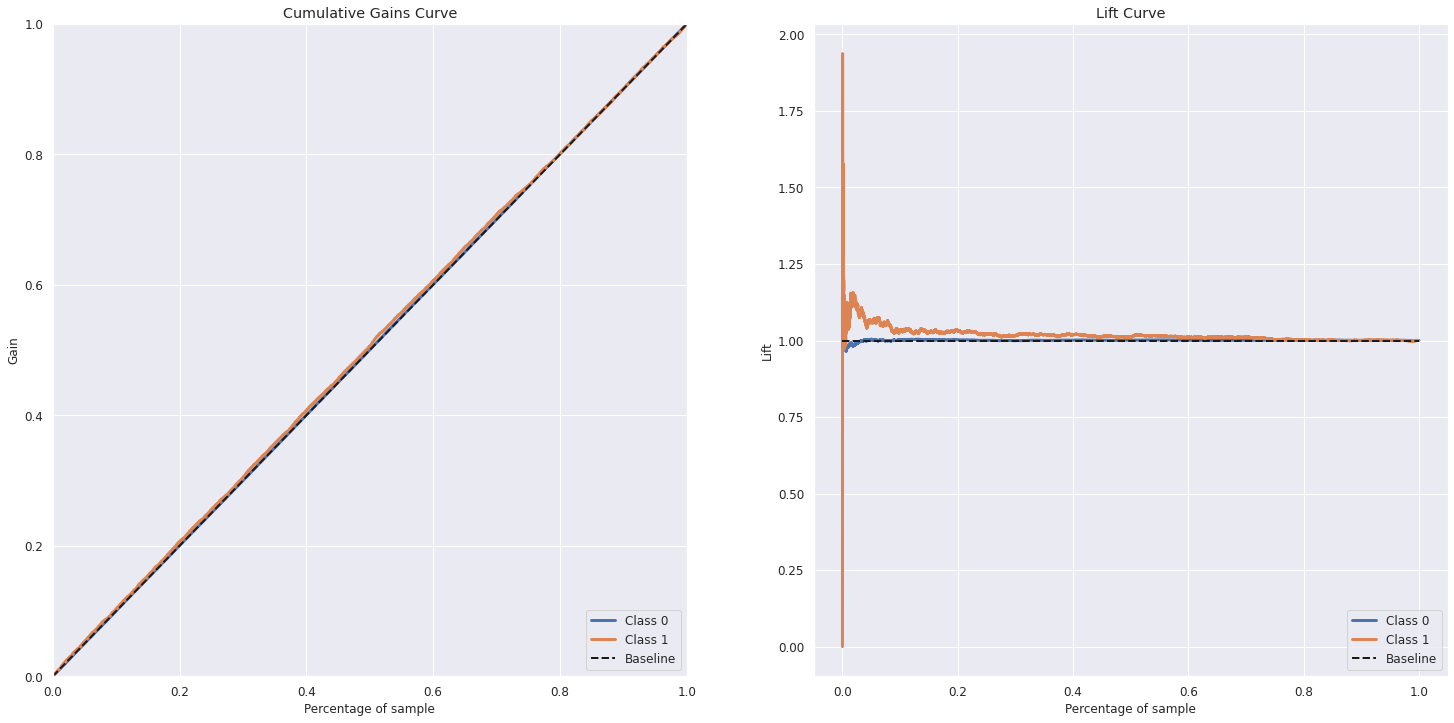

In [65]:
fig, ax = plt.subplots(1,2)
skplt.metrics.plot_cumulative_gain( y_test, yhat_knn, ax=ax[0] )
skplt.metrics.plot_lift_curve( y_test, yhat_knn, ax=ax[1] );

## 7.2. LogisticRegression

In [66]:
# model definition
model_lr = LogisticRegression( random_state=42 ) 

# model training
model_lr.fit( x_train, y_train )

# prediction
yhat_lr = model_lr.predict_proba( x_test )

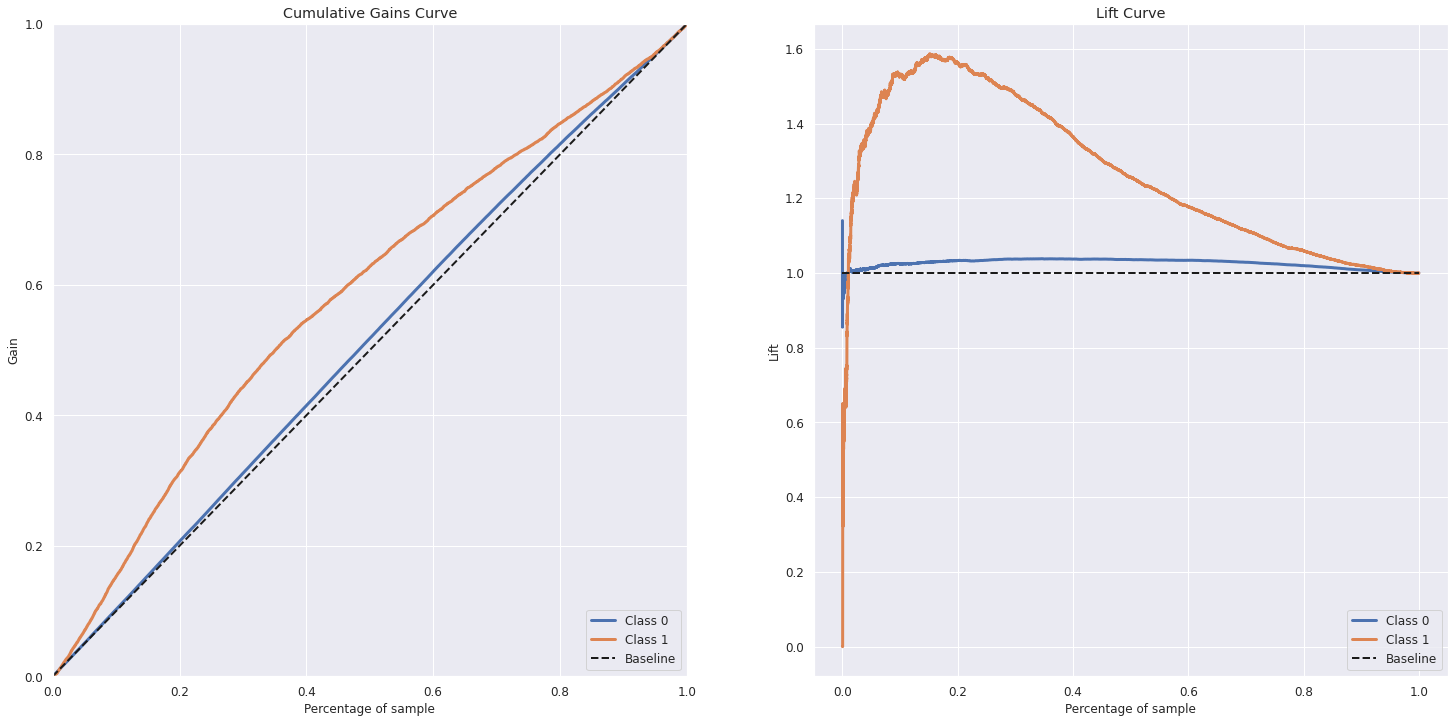

In [67]:
fig, ax = plt.subplots(1,2)
skplt.metrics.plot_cumulative_gain( y_test, yhat_lr, ax=ax[0] )
skplt.metrics.plot_lift_curve( y_test, yhat_lr, ax=ax[1] );

## 7.3. ExtraTreesClassifier

In [69]:
# model definition
model_et = en.ExtraTreesClassifier()

# fit
model_et.fit(x_train, y_train)

# predict
yhat_et = model_et.predict_proba(x_test)

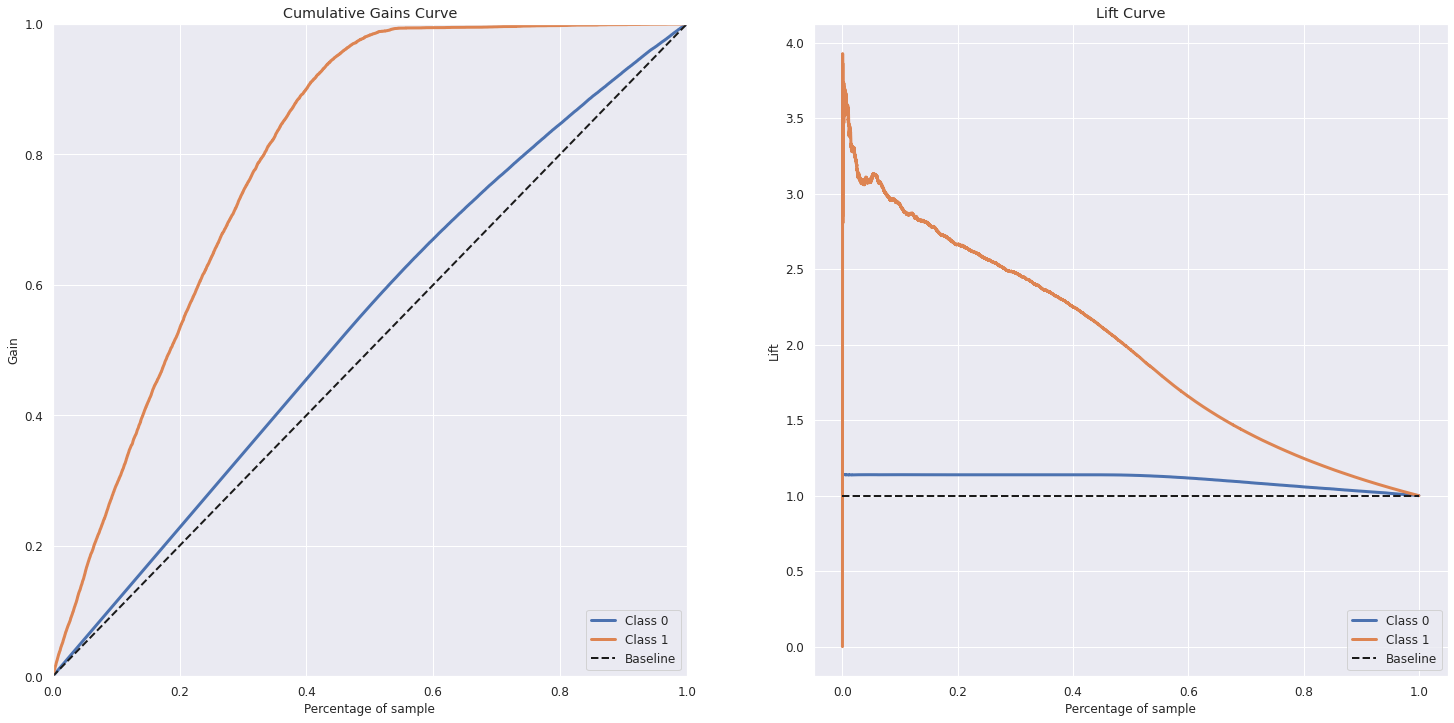

In [70]:
fig, ax = plt.subplots(1,2)
skplt.metrics.plot_cumulative_gain( y_test, yhat_et, ax=ax[0] )
skplt.metrics.plot_lift_curve( y_test, yhat_et, ax=ax[1] );

## 7.4. RandomForestClassifier

In [72]:
# model definition
model_rf = en.RandomForestClassifier()

# fit
model_rf.fit(x_train, y_train)

# predict
yhat_rf = model_rf.predict_proba(x_test)

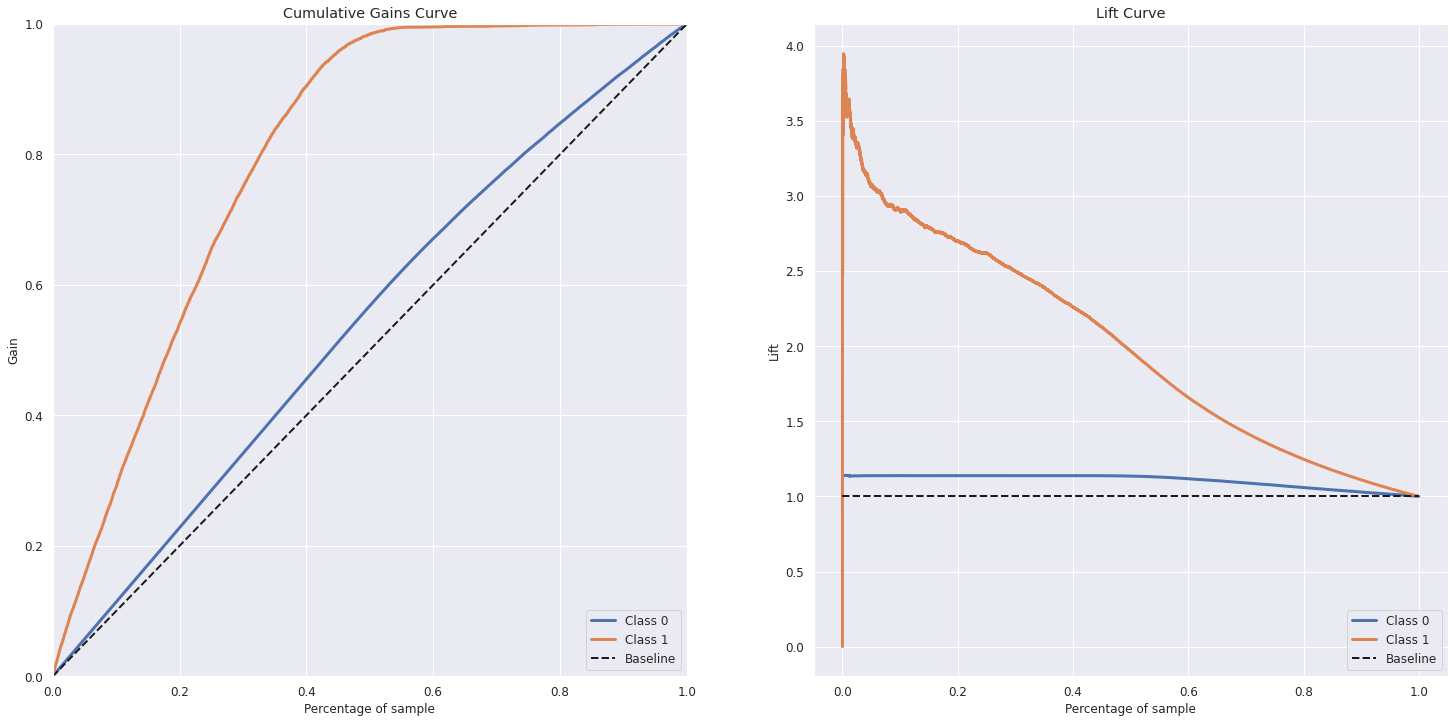

In [73]:
fig, ax = plt.subplots(1,2)
skplt.metrics.plot_cumulative_gain( y_test, yhat_rf, ax=ax[0] )
skplt.metrics.plot_lift_curve( y_test, yhat_rf, ax=ax[1] );

# 8.0. Hyperparameter Fine Tuning

# 9.0. Model Perfomance to Business 

# 10.0. Deploy to Product